學號：0716026
姓名：蕭楚澔

In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from statistics import mean
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from matplotlib.pyplot import figure
import prettytable as pt

In [2]:
# Data input

with open('student-mat.csv') as datafile:
    datasets = datafile.readlines()
    fp = open("student-mat-new.csv", "w")
    for i in range(0, len(datasets)):
        datasets_new = datasets[i].replace(';', ',')
        fp.write(datasets_new)
        
    fp.close()
ds = pd.read_csv('student-mat-new.csv')

In [3]:
# Data preprocessing

# Transform categorical features into one-hot representation.
change_index = ["school", "sex", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob",
                "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", 
                "internet", "romantic"]
df = pd.get_dummies(ds, columns=change_index)
    
# Binary classification
df_B = df.copy()
G3_change = df_B["G3"]
G3_new = []
for i in range(0, len(G3_change)):
    grade = int(G3_change[i])
    if(grade>9):
        G3_new.append(1)
    else:
        G3_new.append(0)
df_B["G3"] = pd.Series(G3_new)

# 5-Level classification
df_5 = df.copy()
G3_change = df_5["G3"]
G3_new = []
for i in range(0, len(G3_change)):
    grade = int(G3_change[i])
    if(grade>15):
        G3_new.append(5)
    elif(grade>13 and grade<16):
        G3_new.append(4)
    elif(grade>11 and grade<14):
        G3_new.append(3)
    elif(grade>9 and grade<12):
        G3_new.append(2)
    else:
        G3_new.append(1)
df_5["G3"] = pd.Series(G3_new)

# For question
df_B_Q = df_B.copy()
df_5_Q = df_5.copy()

# Shuffle the data.
df_B = shuffle(df_B)
df_5 = shuffle(df_5)

# Binary classification
X_B = df_B.drop(columns = ["G3"]).values
y_B = df_B["G3"].values

# 5-Level classification
X_5 = df_5.drop(columns = ["G3"]).values
y_5 = df_5["G3"].values

In [4]:
# Model constructing

# decision tree
# the algorithm sklearn decisiontreeclasifier is an optimal version of CART
def decision_tree(X_train, X_test, y_train, y_test):
    dtc = tree.DecisionTreeClassifier()
    # train with training data
    dtc = dtc.fit(X_train, y_train)
    # predict the result with testing data
    y_pred = dtc.predict(X_test)
    return y_pred

# random forest
def random_forest(X_train, X_test, y_train, y_test, n):
    forest = RandomForestClassifier(n_estimators = n)
    # train with training data
    forest = forest.fit(X_train, y_train)
    # predict the result with testing data
    y_pred = forest.predict(X_test)
    return y_pred

# knn
def k_neighbors(X_train, X_test, y_train, y_test, n):
    knn = KNeighborsClassifier(n_neighbors = n)
    # train with training data
    knn = knn.fit(X_train, y_train)
    # predict the result with testing data
    y_pred = knn.predict(X_test)
    return y_pred

In [5]:
# Validation

K = 3
# Save confusion matrix, accuracy, recall and precision in each list
def result_saved(y_test, y_pred, confusion, accuracy, recall, precision, n):
    if(n == 2):
        lab = [1, 0]
    else:
        lab = [5, 4, 3, 2, 1]
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, labels=lab, average=None)
    pre = precision_score(y_test, y_pred, labels=lab, average=None)
    confusion.append(cm)
    accuracy.append(acc)
    recall.append(rec)
    precision.append(pre)

# K-fold cross validation(binary)
confusion_matrix_DT_B, confusion_matrix_RF_B_1, confusion_matrix_RF_B_2, \
    confusion_matrix_RF_B_3, confusion_matrix_KNN_B_1, confusion_matrix_KNN_B_2, confusion_matrix_KNN_B_3 = [],[],[],[],[],[],[]
accuracy_DT_B, accuracy_RF_B_1, accuracy_RF_B_2, accuracy_RF_B_3, \
    accuracy_KNN_B_1, accuracy_KNN_B_2, accuracy_KNN_B_3 = [],[],[],[],[],[],[]
recall_DT_B, recall_RF_B_1, recall_RF_B_2, recall_RF_B_3, \
    recall_KNN_B_1, recall_KNN_B_2, recall_KNN_B_3 = [],[],[],[],[],[],[]
precision_DT_B, precision_RF_B_1, precision_RF_B_2, precision_RF_B_3, \
    precision_KNN_B_1, precision_KNN_B_2, precision_KNN_B_3 = [],[],[],[],[],[],[]

kf = KFold(n_splits=K)
for train_index, test_index in kf.split(X_B):
    # split the data
    X_train, X_test = X_B[train_index], X_B[test_index]
    y_train, y_test = y_B[train_index], y_B[test_index]
    # Decision tree
    y_pred_DT_B = decision_tree(X_train, X_test, y_train, y_test)
    result_saved(y_test, y_pred_DT_B, confusion_matrix_DT_B, accuracy_DT_B, recall_DT_B, precision_DT_B, 2)
    # Random forest(3 different number trees)
    y_pred_RF_B_1 = random_forest(X_train, X_test, y_train, y_test, 100)
    result_saved(y_test, y_pred_RF_B_1, confusion_matrix_RF_B_1, accuracy_RF_B_1, recall_RF_B_1, precision_RF_B_1, 2)
    y_pred_RF_B_2 = random_forest(X_train, X_test, y_train, y_test, 50)
    result_saved(y_test, y_pred_RF_B_2, confusion_matrix_RF_B_2, accuracy_RF_B_2, recall_RF_B_2, precision_RF_B_2, 2)
    y_pred_RF_B_3 = random_forest(X_train, X_test, y_train, y_test, 150)
    result_saved(y_test, y_pred_RF_B_3, confusion_matrix_RF_B_3, accuracy_RF_B_3, recall_RF_B_3, precision_RF_B_3, 2)
    # KNN(3 different K values)
    y_pred_KNN_B_1 = k_neighbors(X_train, X_test, y_train, y_test, 5)
    result_saved(y_test, y_pred_KNN_B_1, confusion_matrix_KNN_B_1, accuracy_KNN_B_1, recall_KNN_B_1, precision_KNN_B_1, 2)
    y_pred_KNN_B_2 = k_neighbors(X_train, X_test, y_train, y_test, 3)
    result_saved(y_test, y_pred_KNN_B_2, confusion_matrix_KNN_B_2, accuracy_KNN_B_2, recall_KNN_B_2, precision_KNN_B_2, 2)
    y_pred_KNN_B_3 = k_neighbors(X_train, X_test, y_train, y_test, 7)
    result_saved(y_test, y_pred_KNN_B_3, confusion_matrix_KNN_B_3, accuracy_KNN_B_3, recall_KNN_B_3, precision_KNN_B_3, 2)

# K-fold cross validation(5-Level)
confusion_matrix_DT_5, confusion_matrix_RF_5, confusion_matrix_KNN_5 = [],[],[]
accuracy_DT_5, accuracy_RF_5, accuracy_KNN_5 = [],[],[]
recall_DT_5, recall_RF_5, recall_KNN_5 = [],[],[]
precision_DT_5, precision_RF_5, precision_KNN_5 = [],[],[]

kf = KFold(n_splits=K)
for train_index, test_index in kf.split(X_5):
    # split the data
    X_train, X_test = X_5[train_index], X_5[test_index]
    y_train, y_test = y_5[train_index], y_5[test_index]
    # Decision tree
    y_pred_DT_5 = decision_tree(X_train, X_test, y_train, y_test)
    result_saved(y_test, y_pred_DT_5, confusion_matrix_DT_5, accuracy_DT_5, recall_DT_5, precision_DT_5, 5)
    # Random forest
    y_pred_RF_5 = random_forest(X_train, X_test, y_train, y_test, 100)
    result_saved(y_test, y_pred_RF_5, confusion_matrix_RF_5, accuracy_RF_5, recall_RF_5, precision_RF_5, 5)
    # KNN
    y_pred_KNN_5 = k_neighbors(X_train, X_test, y_train, y_test, 5)
    result_saved(y_test, y_pred_KNN_5, confusion_matrix_KNN_5, accuracy_KNN_5, recall_KNN_5, precision_KNN_5, 5)
    
# K-fold cross validation(pca-binary)
confusion_matrix_DT_B_p, confusion_matrix_RF_B_p, confusion_matrix_KNN_B_p = [],[],[]
accuracy_DT_B_p, accuracy_RF_B_p, accuracy_KNN_B_p = [],[],[]
recall_DT_B_p, recall_RF_B_p, recall_KNN_B_p = [],[],[]
precision_DT_B_p, precision_RF_B_p, precision_KNN_B_p = [],[],[]

kf = KFold(n_splits=K)
for train_index, test_index in kf.split(X_B):
    # split the data
    X_train, X_test = X_B[train_index], X_B[test_index]
    y_train, y_test = y_B[train_index], y_B[test_index]
    # Principal components analysis (PCA)
    pca = PCA(n_components=2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    # Decision tree
    y_pred_DT_B_p = decision_tree(X_train, X_test, y_train, y_test)
    result_saved(y_test, y_pred_DT_B_p, confusion_matrix_DT_B_p, accuracy_DT_B_p, recall_DT_B_p, precision_DT_B_p, 2)
    # Random forest
    y_pred_RF_B_p = random_forest(X_train, X_test, y_train, y_test, 100)
    result_saved(y_test, y_pred_RF_B_p, confusion_matrix_RF_B_p, accuracy_RF_B_p, recall_RF_B_p, precision_RF_B_p, 2)
    # KNN
    y_pred_KNN_B_p = k_neighbors(X_train, X_test, y_train, y_test, 5)
    result_saved(y_test, y_pred_KNN_B_p, confusion_matrix_KNN_B_p, accuracy_KNN_B_p, recall_KNN_B_p, precision_KNN_B_p, 2)
    
# K-fold cross validation(pca-5-Level)
confusion_matrix_DT_5_p, confusion_matrix_RF_5_p, confusion_matrix_KNN_5_p = [],[],[]
accuracy_DT_5_p, accuracy_RF_5_p, accuracy_KNN_5_p = [],[],[]
recall_DT_5_p, recall_RF_5_p, recall_KNN_5_p = [],[],[]
precision_DT_5_p, precision_RF_5_p, precision_KNN_5_p = [],[],[]

kf = KFold(n_splits=K)
for train_index, test_index in kf.split(X_5):
    # split the data
    X_train, X_test = X_5[train_index], X_5[test_index]
    y_train, y_test = y_5[train_index], y_5[test_index]
    # Principal components analysis (PCA)
    pca = PCA(n_components=2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    # Decision tree
    y_pred_DT_5_p = decision_tree(X_train, X_test, y_train, y_test)
    result_saved(y_test, y_pred_DT_5_p, confusion_matrix_DT_5_p, accuracy_DT_5_p, recall_DT_5_p, precision_DT_5_p, 5)
    # Random forest
    y_pred_RF_5_p = random_forest(X_train, X_test, y_train, y_test, 100)
    result_saved(y_test, y_pred_RF_5_p, confusion_matrix_RF_5_p, accuracy_RF_5_p, recall_RF_5_p, precision_RF_5_p, 5)
    # KNN
    y_pred_KNN_5_p = k_neighbors(X_train, X_test, y_train, y_test, 5)
    result_saved(y_test, y_pred_KNN_5_p, confusion_matrix_KNN_5_p, accuracy_KNN_5_p, recall_KNN_5_p, precision_KNN_5_p, 5)

In [6]:
# Result calculation

# calculate the mean of confusion matrix
def confusion_matrix_cal(confusion_matrix, n):
    confusion_matrix_sum = [[0 for x in range(n)] for y in range(n)] 
    for k in range(0, 3):
        for i in range(0, n):
            for j in range(0, n):
                confusion_matrix_sum[i][j] += confusion_matrix[k][i][j].item()
    confusion_matrix_sum_np = np.array(confusion_matrix_sum)
    confusion_matrix_result = confusion_matrix_sum_np/3
    return confusion_matrix_result

# calculate the mean of recall and precision
def recall_precision_cal(recall_precision, n):
    recall_precision_sum = [0 for x in range(n)]
    for k in range(0, 3):
        for i in range(0, n):
            recall_precision_sum[i] += recall_precision[k][i].item()
    recall_precision_sum_np = np.array(recall_precision_sum)
    recall_precision_result = recall_precision_sum_np/3
    return recall_precision_result


def result_cal(index, n):
    cm = np.around(confusion_matrix_cal(globals()[("confusion_matrix_"+index)], n))
    globals()["result_"+index].append(cm)
    acc = np.around(mean(globals()[("accuracy_"+index)]), 3)
    globals()["result_"+index].append(acc)
    rec = np.around(recall_precision_cal(globals()[("recall_"+index)], n), 3)
    globals()["result_"+index].append(rec)
    pre = np.around(recall_precision_cal(globals()[("precision_"+index)], n), 3)
    globals()["result_"+index].append(pre)

In [7]:
# Result

result_DT_B = []
result_RF_B_1 = []
result_RF_B_2 = []
result_RF_B_3 = []
result_KNN_B_1 = []
result_KNN_B_2 = []
result_KNN_B_3 = []
result_DT_5 = []
result_RF_5 = []
result_KNN_5 = []
result_DT_B_p = []
result_RF_B_p = []
result_KNN_B_p = []
result_DT_5_p = []
result_RF_5_p = []
result_KNN_5_p = []

Binary = ["DT_B", "RF_B_1", "RF_B_2", "RF_B_3", "KNN_B_1", "KNN_B_2", "KNN_B_3", "DT_B_p", "RF_B_p", "KNN_B_p"]
five_Level = ["DT_5", "RF_5", "KNN_5", "DT_5_p", "RF_5_p", "KNN_5_p"]
    
for index in Binary:
    result_cal(index, 2)
for index in five_Level:
    result_cal(index, 5)
    
blank = [" ", " ", " ", " ", " "]
DT_B = ["Decision tree, Binary, without PCA", result_DT_B[0], result_DT_B[1], 
        "pass: "+str(result_DT_B[2][0])+"\nfail: "+str(result_DT_B[2][1]), 
        "pass: "+str(result_DT_B[3][0])+"\nfail: "+str(result_DT_B[3][1])]
DT_B_p = ["Decision tree, Binary, with PCA", result_DT_B_p[0], result_DT_B_p[1], 
       "pass: "+str(result_DT_B_p[2][0])+"\nfail: "+str(result_DT_B_p[2][1]), 
       "pass: "+str(result_DT_B_p[3][0])+"\nfail: "+str(result_DT_B_p[3][1])]
DT_5 = ["Decision tree, 5-level, without PCA", result_DT_5[0], result_DT_5[1], 
        "A: "+str(result_DT_5[2][0])+"\nB: "+str(result_DT_5[2][1])+"\nC: "+str(result_DT_5[2][2])+"\nD: "+str(result_DT_5[2][3])+"\nE: "+str(result_DT_5[2][4]), 
        "A: "+str(result_DT_5[3][0])+"\nB: "+str(result_DT_5[3][1])+"\nC: "+str(result_DT_5[3][2])+"\nD: "+str(result_DT_5[3][3])+"\nE: "+str(result_DT_5[3][4])]
DT_5_p = ["Decision tree, 5-level, with PCA", result_DT_5_p[0], result_DT_5_p[1], 
        "A: "+str(result_DT_5_p[2][0])+"\nB: "+str(result_DT_5_p[2][1])+"\nC: "+str(result_DT_5_p[2][2])+"\nD: "+str(result_DT_5_p[2][3])+"\nE: "+str(result_DT_5_p[2][4]), 
        "A: "+str(result_DT_5_p[3][0])+"\nB: "+str(result_DT_5_p[3][1])+"\nC: "+str(result_DT_5_p[3][2])+"\nD: "+str(result_DT_5_p[3][3])+"\nE: "+str(result_DT_5_p[3][4])]

RF_B_1 = ["Random Forest, Binary, without PCA, 100 trees", result_RF_B_1[0], result_RF_B_1[1], 
        "pass: "+str(result_RF_B_1[2][0])+"\nfail: "+str(result_RF_B_1[2][1]), 
        "pass: "+str(result_RF_B_1[3][0])+"\nfail: "+str(result_RF_B_1[3][1])]
RF_B_2 = ["Random Forest, Binary, without PCA, 50 trees", result_RF_B_2[0], result_RF_B_2[1], 
        "pass: "+str(result_RF_B_2[2][0])+"\nfail: "+str(result_RF_B_2[2][1]), 
        "pass: "+str(result_RF_B_2[3][0])+"\nfail: "+str(result_RF_B_2[3][1])]
RF_B_3 = ["Random Forest, Binary, without PCA, 150 trees", result_RF_B_3[0], result_RF_B_3[1], 
        "pass: "+str(result_RF_B_3[2][0])+"\nfail: "+str(result_RF_B_3[2][1]), 
        "pass: "+str(result_RF_B_3[3][0])+"\nfail: "+str(result_RF_B_3[3][1])]
RF_B_p = ["Random Forest, Binary, with PCA, 100 trees", result_RF_B_p[0], result_RF_B_p[1], 
        "pass: "+str(result_RF_B_p[2][0])+"\nfail: "+str(result_RF_B_p[2][1]), 
        "pass: "+str(result_RF_B_p[3][0])+"\nfail: "+str(result_RF_B_p[3][1])]
RF_5 = ["Random Forest, 5-level, without PCA, 100 trees", result_RF_5[0], result_RF_5[1], 
        "A: "+str(result_RF_5[2][0])+"\nB: "+str(result_RF_5[2][1])+"\nC: "+str(result_RF_5[2][2])+"\nD: "+str(result_RF_5[2][3])+"\nE: "+str(result_RF_5[2][4]), 
        "A: "+str(result_RF_5[3][0])+"\nB: "+str(result_RF_5[3][1])+"\nC: "+str(result_RF_5[3][2])+"\nD: "+str(result_RF_5[3][3])+"\nE: "+str(result_RF_5[3][4])]
RF_5_p = ["Random Forest, 5-level, with PCA, 100 trees", result_RF_5_p[0], result_RF_5_p[1], 
        "A: "+str(result_RF_5_p[2][0])+"\nB: "+str(result_RF_5_p[2][1])+"\nC: "+str(result_RF_5_p[2][2])+"\nD: "+str(result_RF_5_p[2][3])+"\nE: "+str(result_RF_5_p[2][4]), 
        "A: "+str(result_RF_5_p[3][0])+"\nB: "+str(result_RF_5_p[3][1])+"\nC: "+str(result_RF_5_p[3][2])+"\nD: "+str(result_RF_5_p[3][3])+"\nE: "+str(result_RF_5_p[3][4])]

KNN_B_1 = ["KNN, Binary, without PCA, K = 5", result_KNN_B_1[0], result_KNN_B_1[1], 
        "pass: "+str(result_KNN_B_1[2][0])+"\nfail: "+str(result_KNN_B_1[2][1]), 
        "pass: "+str(result_KNN_B_1[3][0])+"\nfail: "+str(result_KNN_B_1[3][1])]
KNN_B_2 = ["KNN, Binary, without PCA, K = 3", result_KNN_B_2[0], result_KNN_B_2[1], 
        "pass: "+str(result_KNN_B_2[2][0])+"\nfail: "+str(result_KNN_B_2[2][1]), 
        "pass: "+str(result_KNN_B_2[3][0])+"\nfail: "+str(result_KNN_B_2[3][1])]
KNN_B_3 = ["KNN, Binary, without PCA, K = 7", result_KNN_B_3[0], result_KNN_B_3[1], 
        "pass: "+str(result_KNN_B_3[2][0])+"\nfail: "+str(result_KNN_B_3[2][1]), 
        "pass: "+str(result_KNN_B_3[3][0])+"\nfail: "+str(result_KNN_B_3[3][1])]
KNN_B_p = ["KNN, Binary, with PCA, K = 5", result_KNN_B_p[0], result_KNN_B_p[1], 
        "pass: "+str(result_KNN_B_p[2][0])+"\nfail: "+str(result_KNN_B_p[2][1]), 
        "pass: "+str(result_KNN_B_p[3][0])+"\nfail: "+str(result_KNN_B_p[3][1])]
KNN_5 = ["KNN, 5-Level, without PCA, K = 5", result_KNN_5[0], result_KNN_5[1], 
        "A: "+str(result_KNN_5[2][0])+"\nB: "+str(result_KNN_5[2][1])+"\nC: "+str(result_KNN_5[2][2])+"\nD: "+str(result_KNN_5[2][3])+"\nE: "+str(result_KNN_5[2][4]), 
        "A: "+str(result_KNN_5[3][0])+"\nB: "+str(result_KNN_5[3][1])+"\nC: "+str(result_KNN_5[3][2])+"\nD: "+str(result_KNN_5[3][3])+"\nE: "+str(result_KNN_5[3][4])]
KNN_5_p = ["KNN, 5-Level, with PCA, K = 5", result_KNN_5_p[0], result_KNN_5_p[1], 
        "A: "+str(result_KNN_5_p[2][0])+"\nB: "+str(result_KNN_5_p[2][1])+"\nC: "+str(result_KNN_5_p[2][2])+"\nD: "+str(result_KNN_5_p[2][3])+"\nE: "+str(result_KNN_5_p[2][4]), 
        "A: "+str(result_KNN_5_p[3][0])+"\nB: "+str(result_KNN_5_p[3][1])+"\nC: "+str(result_KNN_5_p[3][2])+"\nD: "+str(result_KNN_5_p[3][3])+"\nE: "+str(result_KNN_5_p[3][4])]

output = pt.PrettyTable()
output.field_names = ["Method", "Confusion matrix", "Accuracy", "Recall", "Precision"]
output.add_row(DT_B)
output.add_row(blank)
output.add_row(DT_B_p)
output.add_row(blank)
output.add_row(DT_5)
output.add_row(blank)
output.add_row(DT_5_p)
output.add_row(blank)
output.add_row(RF_B_1)
output.add_row(blank)
output.add_row(RF_B_2)
output.add_row(blank)
output.add_row(RF_B_3)
output.add_row(blank)
output.add_row(RF_B_p)
output.add_row(blank)
output.add_row(RF_5)
output.add_row(blank)
output.add_row(RF_5_p)
output.add_row(blank)
output.add_row(KNN_B_1)
output.add_row(blank)
output.add_row(KNN_B_2)
output.add_row(blank)
output.add_row(KNN_B_3)
output.add_row(blank)
output.add_row(KNN_B_p)
output.add_row(blank)
output.add_row(KNN_5)
output.add_row(blank)
output.add_row(KNN_5_p)
print(output)

+------------------------------------------------+-------------------------+----------+-------------+-------------+
|                     Method                     |     Confusion matrix    | Accuracy |    Recall   |  Precision  |
+------------------------------------------------+-------------------------+----------+-------------+-------------+
|       Decision tree, Binary, without PCA       |        [[36.  8.]       |  0.886   | pass: 0.917 | pass: 0.914 |
|                                                |        [ 7. 81.]]       |          | fail: 0.823 |  fail: 0.83 |
|                                                |                         |          |             |             |
|        Decision tree, Binary, with PCA         |        [[34.  9.]       |  0.868   | pass: 0.906 | pass: 0.899 |
|                                                |        [ 8. 80.]]       |          | fail: 0.792 | fail: 0.808 |
|                                                |                      

```
Comparison & Conclusion:

首先是binary和5-Level的差別，無論是以何種方法，5-Level的準確率大概都維持在0.6~0.7這個區間，而binary則可以達到0.8甚至0.9，
這其實是很合理的，因為binary的label分類比較粗略，只有兩種label，但5-Level的分類則有五種，自然準確度會下降

再來是有無PCA的比較，對這次的資料和這三種方法而言，差異其實沒有到很大，但對計算的複雜程度來說，有PCA一定是更低的，以這次的資料為例，
沒有做PCA的情況有67個column，做完PCA之後剩下2個，除了可以降低訓練的時間複雜度，也可以降低儲存的空間複雜度

接下來是三種model的比較，random forest的準確度明顯會比decision tree稍好，這點也很好理解，random forest利用了更多樹的結果，因
此可以降低單一樹對整個結果帶來的影響，因此準確度高一些也可以理解，而KNN的準確率大概跟decision tree差不多，比random forest差一點，
我的想法是knn也是對單一筆資料做分類而已，意義上接近decision tree的做法，不會像random forest一樣產生許多結果並修正自己的模型

最後說明一下，在decision tree中，我嘗試取三種不同tree number做實驗，分別是50、100、150，但結果沒有呈現穩定成長或穩定下降，推測是
overfitting的結果，在KNN中，我取三種不同K值，分別是3、5、7，似乎也沒有看出明顯差異，可能是K值不夠大
```

```
1. Question - Decision Tree:
Show the prediction and reasoning of one arbitrary sample in the testing set.
```

sample's feature:
[18  2  2  0  4  3  4  1  1  3  6  5  6  1  0  1  0  0  1  1  0  1  0  0
  0  0  0  1  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  1  0  0  0  0
  1  0  0  1  1  0  1  0  1  0  0  1  0  1  1  0  1  0]
sample's class: 0
decision 1: G2 <= 9.5, sample's G2 = 6 < 9.5 => yes(left)
decision 2: G2 <= 8.5, sample's G2 = 6 < 8.5 => yes(left)
decision 3: traveltime <= 2.5, sample's traveltime = 2 < 2.5 => yes(left)
predict label: fail(0)
real label: fail(0)


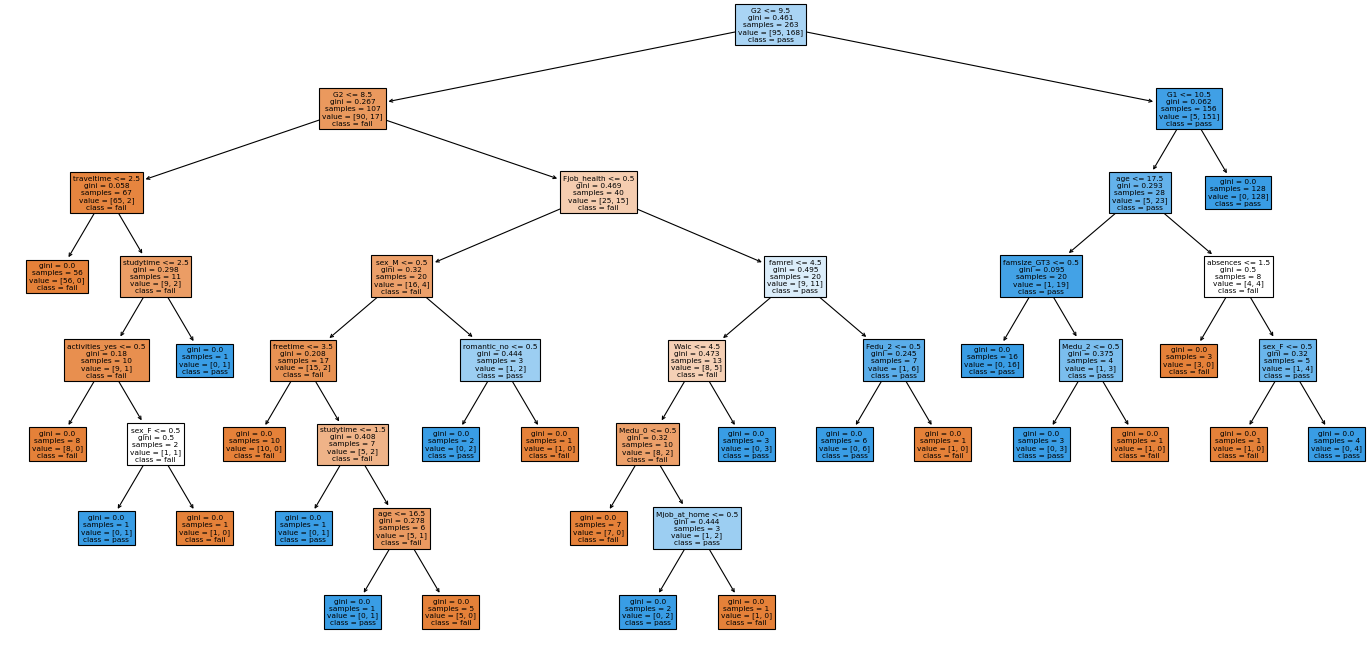

In [8]:
first = True
fn = []
for col in df_B_Q.columns:
    fn.append(col)
cn=['fail', 'pass']
X_B = df_B_Q.drop(columns = ["G3"]).values
y_B = df_B_Q["G3"].values

kf = KFold(n_splits=K)
for train_index, test_index in kf.split(X_B):
    # split the data
    X_train, X_test = X_B[train_index], X_B[test_index]
    y_train, y_test = y_B[train_index], y_B[test_index]
    dtc = tree.DecisionTreeClassifier()
    dtc = dtc.fit(X_train, y_train)
    if(first == True):
        first = False
        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(20, 10), dpi=80)
        tree.plot_tree(dtc,
                       feature_names = fn, 
                       class_names=cn,
                       filled = True);
        print("sample's feature:")
        print(X_test[0])
        print("sample's class: "+str(y_test[0]))
        print("decision 1: G2 <= 9.5, sample's G2 = 6 < 9.5 => yes(left)")
        print("decision 2: G2 <= 8.5, sample's G2 = 6 < 8.5 => yes(left)")
        print("decision 3: traveltime <= 2.5, sample's traveltime = 2 < 2.5 => yes(left)")
        print("predict label: fail(0)")
        print("real label: fail(0)")

```
2. Question - Random forest:
Describe the difference between boosting and bagging.
Ans: 
      bagging是將原本的資料分為許多subsets，並利用這些subset各自的model去得出一個獨立的結果，之後再將所有結果合併，作為最終
      的預測，因此可以排除部分非常不準的結果
      boosting是先取出一部分的資料當作subset，利用這個subset產生的model去預測全部dataset，接著賦予預測錯誤的data
      較高的weight，接著再重複前面的步驟，因此每一次新的model都會修正前面model錯誤的部分，從而得到一個更準確的model
      兩者最大的差異在於，bagging是平行、平等的，個別model的結果互不影響，所以對單一不合群的data比較不會被影響，而
      boosting因為會針對之前的錯誤做修正，所以可能會受到少數不合群的data影響，因而overfitting
```

```
3. Question - KNN:
Show the prediction and reasoning of one arbitrary sample in the testing set.
```

In [9]:
X_5 = df_5_Q.drop(columns = ["G3"]).values
y_5 = df_5_Q["G3"].values

X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size = 0.3, random_state=100)
# PCA(5-Level)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

neigh = NearestNeighbors(n_neighbors = 5)
neigh.fit(X_train)

print("Sample's feauture:")
print(X_test[0])
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("\nKNN predict result:", knn.predict(X_test)[0], "\n")
chosen_K = neigh.kneighbors([X_test[0]])[1][0]
distance_K = neigh.kneighbors([X_test[0]])[0][0]
print("K nearest neighbors: ")

output = pt.PrettyTable()
output.field_names = ["number", "features", "label", "distance"]
for i in range(0, 5):
    row = []
    row.append(i+1)
    row.append(X_train[chosen_K[i]])
    row.append(y_train[chosen_K[i]])
    row.append(distance_K[i])
    output.add_row(row)
print(output)

print("\n因為neighbors中有三個1，兩個2，所以預測結果是1")

Sample's feauture:
[0.71161724 4.73061182]

KNN predict result: 1 

K nearest neighbors: 
+--------+-------------------------+-------+--------------------+
| number |         features        | label |      distance      |
+--------+-------------------------+-------+--------------------+
|   1    | [0.63499753 5.27714136] |   1   | 0.5518741855256744 |
|   2    | [0.61599045 3.97804481] |   1   | 0.7586182002466287 |
|   3    | [0.68490067 3.77044689] |   2   | 0.9605365519223118 |
|   4    | [1.71460337 4.78947875] |   1   | 1.0047121444250553 |
|   5    | [0.59394419 3.12666743] |   2   | 1.6082551196270767 |
+--------+-------------------------+-------+--------------------+

因為neighbors中有三個1，兩個2，所以預測結果是1


```
4. Question - KNN(Bonus):
pick 2 features, draw and describe the KNN decision boundaries.
```

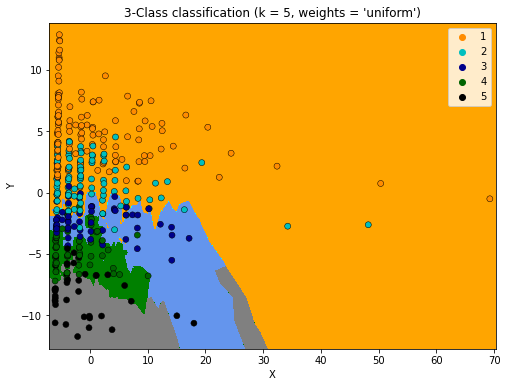

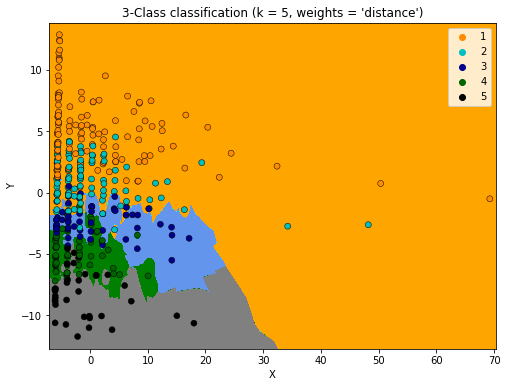

In [10]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue", "green", "grey"])
cmap_bold = ["darkorange", "c", "darkblue", "darkgreen", "black"]

# PCA(5-Level)
pca = PCA(n_components=2)
p_X_5 = pca.fit_transform(X_5)

X = p_X_5[:, :2]
y = y_5

h = 0.02  # step size in the mesh
n_neighbors = 5

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        alpha=1.0,
        palette=cmap_bold,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel("X")
    plt.ylabel("Y")

plt.show()

```
5. Question - PCA:
In 5-Level classification, reduce the data dimension to 2 using PCA and draw a scatter plot.
You have to colorize the data points based on their labels.
```

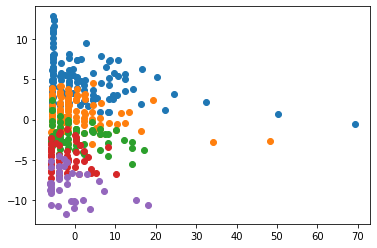

In [11]:
# PCA(5-Level)
pca = PCA(n_components=2)
p_X_5 = pca.fit_transform(X_5)

label_list = [[], [], [], [], []]
for i in range(len(y_5)):
    label_list[y_5[i]-1].append(p_X_5[i].tolist())

for i in range(0, 5):
    LL = label_list[i]
    x_list = []
    y_list = []
    for row in LL:
        x_list.append(row[0])
        y_list.append(row[1])
    x = np.array(x_list)
    y = np.array(y_list)
    plt.scatter(x, y)